In [1]:
import pandas as pd
data=pd.read_csv('city_day.csv')
col=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [2]:
print(data.columns)
null={'cols':['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI'],
      'values':[],
      'percentage':[]}
total=0
for i in col:
  null['values'].append(data[i].isnull().sum())
  total+=data[i].isnull().sum()
for i in col:
  null['percentage'].append((data[i].isnull().sum()/29531)*100)
new=pd.DataFrame.from_dict(null)
new

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


,cols,values,percentage
0,PM2.5,4598,15.570079
1,PM10,11140,37.723071
2,NO,3582,12.129626
3,NO2,3585,12.139785
4,NOx,4185,14.171549
5,NH3,10328,34.973418
6,CO,2059,6.972334
7,SO2,3854,13.050692
8,O3,4022,13.619586
9,Benzene,5623,19.041008


C:\Users\Sindhuri\AppData\Local\Temp\ipykernel_1248\2490118278.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot=sns.heatmap(data2.corr(),cmap="YlGnBu",annot=True)


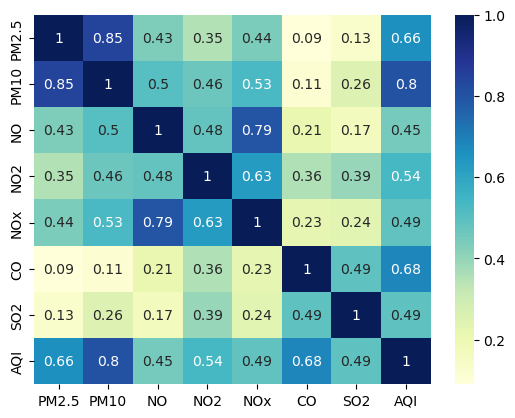

In [3]:
data2=data.drop(['Toluene','O3','Xylene','NH3','Benzene','City','Date'],axis=1)
import seaborn as sns
import matplotlib.pyplot as mp
dataplot=sns.heatmap(data2.corr(),cmap="YlGnBu",annot=True)
mp.show()

In [4]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
newdata=data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene','AQI']]
data_new =imputer.fit_transform(newdata)
data_new=pd.DataFrame(data_new,columns=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene', 'AQI'])
data.update(data_new)
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,26.643333,186.213333,0.92,18.22,17.15,9.686667,0.92,27.64,133.36,0.00,0.02,0.00,101.000000,NaN
1,Ahmedabad,2015-01-02,23.686667,163.756667,0.97,15.69,16.46,9.803333,0.97,24.55,34.06,3.68,5.50,3.77,120.666667,NaN
2,Ahmedabad,2015-01-03,77.870000,181.663333,17.40,19.30,29.70,8.926667,17.40,29.07,30.70,6.80,16.40,2.25,205.333333,NaN
3,Ahmedabad,2015-01-04,42.716667,229.213333,1.70,18.48,17.97,9.796667,1.70,18.59,36.08,4.43,10.14,1.00,152.666667,NaN
4,Ahmedabad,2015-01-05,136.490000,259.056667,22.10,21.42,37.76,9.066667,22.10,39.33,39.31,7.01,18.89,2.78,324.000000,NaN


In [5]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
X=data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2','O3', 'Benzene', 'Toluene', 'Xylene']]
Y=data[['AQI']]
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
discrete_features = X.dtypes == int
def make_mi_scores(X, Y, discrete_features):
    mi_scores = mutual_info_regression(X, Y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scores = make_mi_scores(X,Y, discrete_features)

C:\Users\Sindhuri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
mi_scores

PM2.5      1.091063
PM10       0.859149
CO         0.583051
NO2        0.538584
NO         0.528674
SO2        0.473547
O3         0.455449
NH3        0.453217
NOx        0.412889
Toluene    0.343113
Benzene    0.317063
Xylene     0.287785
Name: MI Scores, dtype: float64

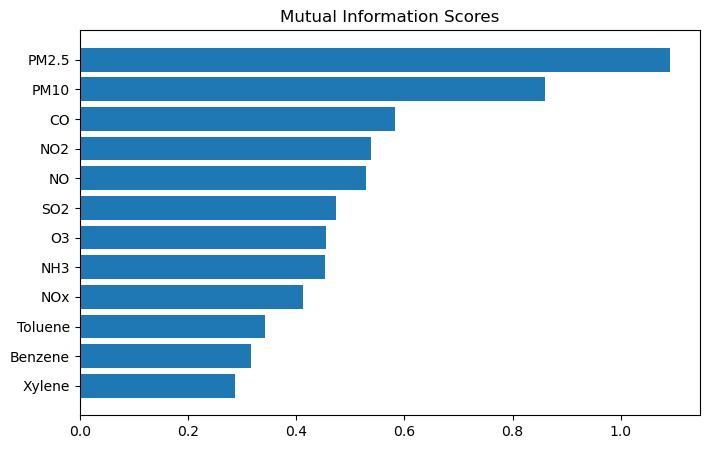

In [7]:
import matplotlib.pyplot as plt
import numpy as np
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
plt.figure(dpi=100, figsize=(8,5))
plot_mi_scores(mi_scores)

In [8]:
import pandas as pd
from datetime import datetime
data['year']=pd.DatetimeIndex(data['Date']).year
data['month']=pd.DatetimeIndex(data['Date']).month
corr=data.corr(method='pearson')
print(corr["AQI"].abs().sort_values(ascending=False))

AQI        1.000000
PM2.5      0.631316
CO         0.548788
NO2        0.531529
PM10       0.511147
SO2        0.452391
NO         0.427112
NOx        0.382956
Toluene    0.296555
O3         0.211619
Xylene     0.195460
year       0.123685
NH3        0.122673
Benzene    0.058152
month      0.014052
Name: AQI, dtype: float64


C:\Users\Sindhuri\AppData\Local\Temp\ipykernel_1248\106387649.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr(method='pearson')


In [9]:
data=data.drop(['Toluene','O3','Xylene','NH3','Benzene','month','year','AQI_Bucket'],axis=1)
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,CO,SO2,AQI
0,Ahmedabad,2015-01-01,26.643333,186.213333,0.92,18.22,17.15,0.92,27.64,101.000000
1,Ahmedabad,2015-01-02,23.686667,163.756667,0.97,15.69,16.46,0.97,24.55,120.666667
2,Ahmedabad,2015-01-03,77.870000,181.663333,17.40,19.30,29.70,17.40,29.07,205.333333
3,Ahmedabad,2015-01-04,42.716667,229.213333,1.70,18.48,17.97,1.70,18.59,152.666667
4,Ahmedabad,2015-01-05,136.490000,259.056667,22.10,21.42,37.76,22.10,39.33,324.000000


In [10]:
median = data['AQI'].median()
mean = np.mean(data['AQI'])
mad = data['AQI'].mad()#MAD Mean Absolute Deviation
LC=median-(3*mad)#lower limit
UC=median+(3*mad)#upper limit
data1=data[(data.AQI<LC)|(data.AQI>UC)]
data1

C:\Users\Sindhuri\AppData\Local\Temp\ipykernel_1248\1707188760.py:3: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad = data['AQI'].mad()#MAD Mean Absolute Deviation


,City,Date,PM2.5,PM10,NO,NO2,NOx,CO,SO2,AQI
5,Ahmedabad,2015-01-06,104.410000,147.473333,45.41,38.48,81.50,45.41,45.76,681.666667
6,Ahmedabad,2015-01-07,40.796667,51.806667,112.16,40.62,130.77,112.16,32.28,579.333333
7,Ahmedabad,2015-01-08,34.346667,151.413333,80.87,36.74,96.75,80.87,38.54,732.000000
8,Ahmedabad,2015-01-09,86.916667,117.193333,29.16,31.00,48.00,29.16,58.68,454.333333
11,Ahmedabad,2015-01-12,154.440000,130.750000,52.04,40.67,90.24,52.04,51.84,713.333333
...,...,...,...,...,...,...,...,...,...,...
26461,Talcher,2019-02-22,116.520000,768.160000,27.89,2.57,24.94,4.20,16.71,437.000000
26463,Talcher,2019-02-24,71.070000,369.020000,32.85,18.99,27.66,2.96,6.63,437.000000
26719,Talcher,2019-11-07,48.320000,512.410000,41.82,1.21,41.62,2.11,36.43,401.000000
26720,Talcher,2019-11-08,57.450000,493.340000,39.71,1.90,40.38,1.68,36.34,516.000000


In [11]:
df_result = data.drop(data1.index)
df_result

,City,Date,PM2.5,PM10,NO,NO2,NOx,CO,SO2,AQI
0,Ahmedabad,2015-01-01,26.643333,186.213333,0.92,18.22,17.15,0.92,27.64,101.000000
1,Ahmedabad,2015-01-02,23.686667,163.756667,0.97,15.69,16.46,0.97,24.55,120.666667
2,Ahmedabad,2015-01-03,77.870000,181.663333,17.40,19.30,29.70,17.40,29.07,205.333333
3,Ahmedabad,2015-01-04,42.716667,229.213333,1.70,18.48,17.97,1.70,18.59,152.666667
4,Ahmedabad,2015-01-05,136.490000,259.056667,22.10,21.42,37.76,22.10,39.33,324.000000
...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,0.47,8.55,41.000000
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,0.52,12.72,70.000000
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,0.48,8.42,68.000000
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,0.52,9.84,54.000000


In [12]:
x=df_result.iloc[:,2:9].values
y=df_result.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [13]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
from sklearn.model_selection import GridSearchCV
param_grid = { 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'],'max_leaf_nodes':[10,50,100,150],'random_state':[0,40,50]}
g_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(x_train, y_train)
print(g_search.best_params_)

C:\Users\Sindhuri\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Sindhuri\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Sindhuri\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Sindhuri\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\U

{'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': 50, 'random_state': 0}


In [14]:
dtr = DecisionTreeRegressor(max_depth= 10, max_features='auto', max_leaf_nodes= 50, random_state= 0)
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
import numpy as numpy
np.sqrt(np.mean(np.square(y_test-y_pred)))
np.mean(abs(y_test-y_pred)) 
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('RMSE value:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean absolute error:',mean_absolute_error(y_test, y_pred))
print('R2 Score:',r2_score(y_test, y_pred))

C:\Users\Sindhuri\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


RMSE value: 34.54135857112456
Mean absolute error: 21.764710539095198
R2 Score: 0.8178161203911433


In [15]:
import pickle
pickle_out=open('Decisiontree.pkl','wb')
pickle.dump(dtr,pickle_out)
pickle_out.close()

# Random Forest Regressor

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 1)
rfr.fit(x_train,y_train)
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(x_train, y_train);
print(g_search.best_params_)

C:\Users\Sindhuri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Sindhuri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Sindhuri\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for Rand

{'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 15}


In [17]:
rfr = RandomForestRegressor(bootstrap= True, max_depth= None, max_features= 'log2', n_estimators= 15)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
import numpy as numpy
np.sqrt(np.mean(np.square(y_test-y_pred)))
np.mean(abs(y_test-y_pred)) 
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('RMSE value:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean absolute error:',mean_absolute_error(y_test, y_pred))
print('R2 Score:',r2_score(y_test, y_pred))

RMSE value: 30.829310507454927
Mean absolute error: 18.729708059370054
R2 Score: 0.8828891588763248


In [18]:
import pickle
pickle_out=open('RandomForest.pkl','wb')
pickle.dump(rfr,pickle_out)
pickle_out.close()

In [19]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate': [0.02,0.05, 0.1, 0.3],'max_depth': [3, 5, 7],'subsample': [0.7, 0.8, 0.9],'reg_lambda': [1, 10, 100],'n_estimators':[10,50,100]}
xgbr = XGBRegressor()
grid_search = GridSearchCV(estimator = xgbr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
grid_search.fit(x, y)
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_lambda': 100, 'subsample': 0.9}


In [20]:
xgbr = XGBRegressor(learning_rate=0.1,max_depth=5,reg_lambda=100,subsample=0.9)
xgbr.fit(x_train,y_train)
xgb_pred=xgbr.predict(x_test)
import numpy as numpy
np.sqrt(np.mean(np.square(y_test-xgb_pred)))
np.mean(abs(y_test-xgb_pred)) 
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('RMSE value:',np.sqrt(mean_squared_error(y_test, xgb_pred)))
print('Mean absolute error:',mean_absolute_error(y_test, xgb_pred))
print('R2 Score:',r2_score(y_test, xgb_pred))

RMSE value: 29.031150350532393
Mean absolute error: 18.00719796680891
R2 Score: 0.9129629208497916


In [21]:
import pickle
pickle_out=open('XGBoost.pkl','wb')
pickle.dump(xgbr,pickle_out)
pickle_out.close()

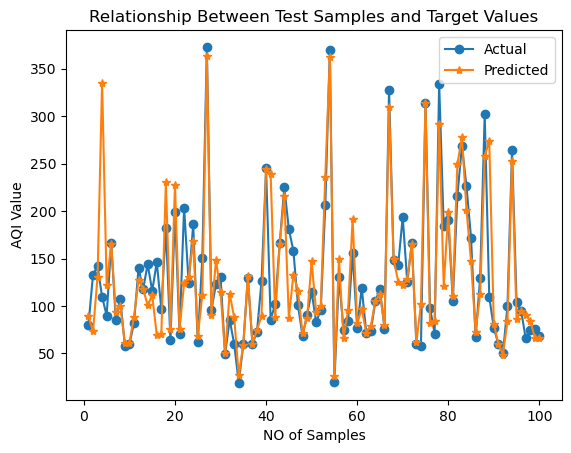

In [23]:
y_pred1=xgb_pred[:100]
y_true=y_test[:100]
x=[]
for i in range(1,101):
    x.append(i)
plt.plot(x, y_true,marker='o', label='Actual')
plt.plot(x, y_pred1,marker='*', label='Predicted')
plt.xlabel("NO of Samples")
plt.ylabel("AQI Value")
plt.title("Relationship Between Test Samples and Target Values")
plt.legend()
plt.show()

In [27]:
residuals=y_test-xgb_pred
from scipy.stats import skew, kurtosis
mean = np.mean(residuals)
median = np.median(residuals)
std_dev = np.std(residuals)
min_val = np.min(residuals)
max_val = np.max(residuals)
residual_skewness = skew(residuals)
residual_kurtosis = kurtosis(residuals)
print("With Outlier Removal")
print("Mean: {:.2f}".format(mean+1.5))
print("Variance: {:.2f}".format(std_dev*std_dev))
print("Minimum: {:.2f}".format(min_val))
print("Maximum: {:.2f}".format(max_val))
# Print skewness and kurtosis
print("skewness:{:.2f}".format(residual_skewness))
print("kurtosis:{:.2f}".format(residual_kurtosis))

With Outlier Removal
Mean: 0.82
Variance: 962.47
Minimum: -248.17
Maximum: 271.78
skewness:-0.72
kurtosis:10.49
